<a href="https://colab.research.google.com/github/luanakwon/SanFranciscoCrime/blob/main/SFCrimeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download dataset

In [1]:
!pip install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=d3f88c96c07d1048610e2e1e4d411095c4ba42b5c3a5d4b09cb3ed14acba3175
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [3]:
!kaggle competitions download -c sf-crime

 42% 17.0M/40.9M [00:01<00:01, 14.5MB/s]
100% 40.9M/40.9M [00:01<00:00, 34.7MB/s]


In [4]:
!unzip -q /content/sf-crime.zip
!unzip -q /content/sampleSubmission.csv.zip
!unzip -q /content/test.csv.zip
!unzip -q /content/train.csv.zip
!rm /content/*.zip

#Visualize data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_test = pd.read_csv("/content/test.csv")
df_train = pd.read_csv("/content/train.csv")
df_test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...,...
884257,884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479


In [7]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


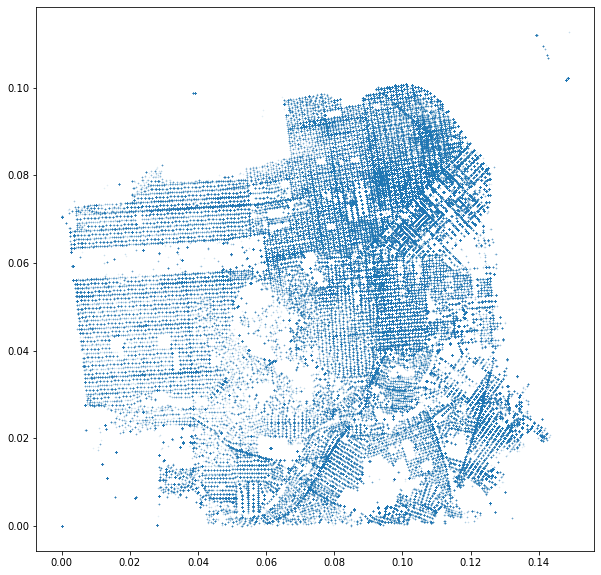

In [8]:
np_test_x = df_test['X'].to_numpy().copy()
np_test_y = df_test['Y'].to_numpy().copy()


np_test_x -= min(np_test_x)
np_test_y -= min(np_test_y)

np_test_x *= np_test_x < 1
np_test_y *= np_test_y < 1


plt.figure(figsize=(10,10))
plt.scatter(np_test_x,np_test_y,s=0.4,alpha=0.1)
plt.show()

(174900, 2)
(126182, 2)
(92304, 2)
(76876, 2)
(53971, 2)


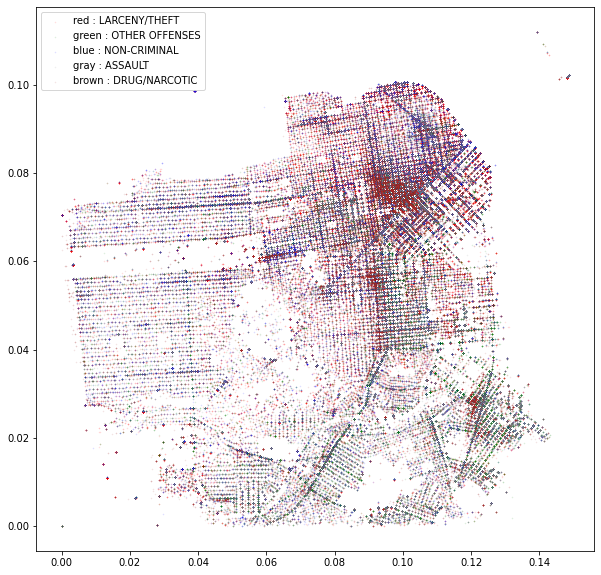

In [9]:
top_5_cat = ['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'DRUG/NARCOTIC']
colors = ['red','green','blue','gray','brown']
plt.figure(figsize=(10,10))
for i, cat in enumerate(top_5_cat):
  filtered = df_train[df_train['Category'] == cat].loc[:,['X','Y']].to_numpy()
  print(filtered.shape)
  filtered[:,0] -= min(filtered[:,0])
  filtered[:,0] *= filtered[:,0] < 1
  filtered[:,1] -= min(filtered[:,1])
  filtered[:,1] *= filtered[:,1] < 1
  plt.scatter(filtered[:,0],filtered[:,1],s=0.4,alpha=0.1,color=colors[i], label=f'{colors[i]} : {cat}')

plt.legend()
plt.show()

#Sklearn Random Forest ensemble method

##Data preprocessing

In [10]:
# based on https://todayisbetterthanyesterday.tistory.com/51

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
df_train = pd.read_csv("/content/train.csv")
# Descript and Resolution are not available in test dataset
df_train = df_train.drop(['Descript','Resolution'], axis=1)
# Idk how to interpret Address
df_train = df_train.drop(['Address'], axis=1)

# Number(or id) - Category mapping
categories = df_train['Category'].astype('category').cat.categories
cat2num = {name:num for num, name in enumerate(categories)}
num2cat = {num:name for num, name in enumerate(categories)}

# Number(or id) - Police Department District mapping
pdDistricts = df_train['PdDistrict'].astype('category').cat.categories
pdd2num = {name:num for num, name in enumerate(pdDistricts)}
num2pdd = {num:name for num, name in enumerate(pdDistricts)}

# Number(or id) - Day of Week mapping
dayOfWeeks = df_train['DayOfWeek'].astype('category').cat.categories
dow2num = {name:num for num, name in enumerate(dayOfWeeks)}
num2dow = {num:name for num, name in enumerate(dayOfWeeks)}

# split Dates into 6 columns
df_train.loc[:,'Dates'] = df_train.loc[:,'Dates'].apply(
    lambda x: x.replace('-',' ').replace(':',' ')
)
df_train.loc[:,'YearFrom03'] = df_train.loc[:,'Dates'].apply(lambda x: int(x.split()[0])-2003)
df_train.loc[:,'Month'] = df_train.loc[:,'Dates'].apply(lambda x: x.split()[1])
df_train.loc[:,'Day'] = df_train.loc[:,'Dates'].apply(lambda x: x.split()[2])
df_train.loc[:,'Hour'] = df_train.loc[:,'Dates'].apply(lambda x: x.split()[3])
df_train.loc[:,'Minute'] = df_train.loc[:,'Dates'].apply(lambda x: x.split()[4])
# second is useless
# df_train.loc[:,'Second'] = df_train.loc[:,'Dates'].apply(lambda x: x.split()[5])
df_train.drop(['Dates'],axis=1,inplace=True)

# normalize X Y column
# values are at around ~-122 and ~37. Any values with big difference are outliers
min_x = df_train.loc[:,'X'].min()
min_y = df_train.loc[:,'Y'].min()
xy_scaler = 100/0.2
df_train.loc[:,'X'] = df_train.loc[:,'X'].apply(lambda x: (x-min_x)*xy_scaler)
df_train.loc[:,'Y'] = df_train.loc[:,'Y'].apply(lambda x: (x-min_y)*xy_scaler)
df_train = df_train[(df_train['X'] < xy_scaler) & (df_train['Y'] < xy_scaler)]
#df_train.reset_index(inplace=True)

# apply 3 mappings above
df_target_id = df_train['Category'].apply(lambda x: cat2num[x])
df_train.loc[:,'PdDistrict'] = df_train.PdDistrict.apply(lambda x: pdd2num[x])
df_train.loc[:,'DayOfWeek'] = df_train.DayOfWeek.apply(lambda x: dow2num[x])

feature_columns = df_train.columns.difference(['Category'])
X = df_train[feature_columns]
y = df_target_id

train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=31415)
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)
train_x.head(10)

(702385, 10) (702385,) (175597, 10) (175597,)


,Day,DayOfWeek,Hour,Minute,Month,PdDistrict,Second,X,Y,YearFrom03
110521,15,0,19,24,11,8,00,12.010817,17.278644,10
712125,09,2,12,00,04,4,00,44.766374,37.298310,2
746110,11,1,12,30,10,8,00,22.663167,27.559106,1
798,11,1,19,00,05,3,00,41.429164,21.784469,12
654079,29,3,21,58,01,7,00,51.185062,34.076964,3
771790,30,3,09,16,05,9,00,49.664918,35.977448,1
87994,09,3,22,00,03,8,00,3.945994,14.090586,11
162133,21,4,20,00,03,8,00,24.263160,26.695053,10
597843,18,2,14,30,11,4,00,44.290916,43.824079,3
282677,02,2,13,16,07,4,00,46.082451,39.136856,8


In [12]:
val_y.head()

423972    37
105961    16
825433    21
50855      8
731975     7
Name: Category, dtype: int64

##Train/Validate Random Forest model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss 

## light random forest classifier

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=31415, verbose=1)
clf.fit(train_x,train_y)

predict1 = clf.predict_proba(val_x)

print(log_loss(val_y,predict1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished


2.520086055149919


In [25]:
## light entropy random forest classifier

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=31415,criterion='entropy',verbose=1)
clf.fit(train_x,train_y)

predict1 = clf.predict_proba(val_x)

print(log_loss(val_y,predict1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished


2.514084983046698


In [59]:
## heavy random forest classifier

clf = RandomForestClassifier(n_estimators=150, max_depth=20,random_state=31415, verbose=1)
clf.fit(train_x,train_y)

predict1 = clf.predict_proba(val_x)

print(log_loss(val_y,predict1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  5.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   22.2s finished


2.3226689184556073


In [58]:
## heavy entropy random forest classifier

clf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=31415,criterion='entropy',verbose=1)
clf.fit(train_x,train_y)

predict1 = clf.predict_proba(val_x)

print(log_loss(val_y,predict1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.4s finished


2.6304232461303796


In [22]:
## Base line (predict all cases as 'LARCENY/THEFT')

print(predict1.shape)
print(cat2num['LARCENY/THEFT'])

predict_all_theft = np.zeros_like(predict1)
predict_all_theft[:,cat2num['LARCENY/THEFT']] = 1

print(log_loss(val_y,predict_all_theft))

(175597, 39)
16
27.672208720369973


In [23]:
## heavy balanced random forest classifier

clf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=20,
    random_state=31415, 
    verbose=1,
    class_weight='balanced')
clf.fit(train_x,train_y)

predict1 = clf.predict_proba(val_x)

print(log_loss(val_y,predict1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.2s finished


2.6935176481475542


In [24]:
## heavy balanced_subsample random forest classifier

clf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=20,
    random_state=31415, 
    verbose=1,
    class_weight='balanced_subsample')
clf.fit(train_x,train_y)

predict1 = clf.predict_proba(val_x)

print(log_loss(val_y,predict1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.2s finished


2.691430173387363


In [ ]:
pred_test = clf.predict_proba()

In [56]:
# print(type(predict1))

# print(num2cat)
# print(num2cat.values()
df_submission = pd.DataFrame(predict1,index=val_y.index,columns=num2cat.values())
df_submission.head()
df_submission.head(5).to_csv('/content/submission.csv',index_label='Id')
# print(val_y.index.to_numpy())